#  An interactive GUI in python has been built that helps understand the effect of Rock and Oil properties on Pressure profile in the reservoir.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive
from IPython.display import display

In [8]:
re = 3000   #Outer radius of Reservoir(ft)
rwf = 0.5   #Wellbore Radius(ft)
pwf = 1500  #Bottomhole Pressure (psi)
h =60       #Net Pay Thickness(ft)
k = 150     #Average Reservoir Permeability (mD)
q = 200     #Flowrate (STB/Day)
mu = 15     #Oil Viscosity
B =1        #Formation Volume Factor

In [9]:
r = np.linspace(rwf,re,500)

In [11]:
r

array([5.00000000e-01, 6.51102204e+00, 1.25220441e+01, 1.85330661e+01,
       2.45440882e+01, 3.05551102e+01, 3.65661323e+01, 4.25771543e+01,
       4.85881764e+01, 5.45991984e+01, 6.06102204e+01, 6.66212425e+01,
       7.26322645e+01, 7.86432866e+01, 8.46543086e+01, 9.06653307e+01,
       9.66763527e+01, 1.02687375e+02, 1.08698397e+02, 1.14709419e+02,
       1.20720441e+02, 1.26731463e+02, 1.32742485e+02, 1.38753507e+02,
       1.44764529e+02, 1.50775551e+02, 1.56786573e+02, 1.62797595e+02,
       1.68808617e+02, 1.74819639e+02, 1.80830661e+02, 1.86841683e+02,
       1.92852705e+02, 1.98863727e+02, 2.04874749e+02, 2.10885772e+02,
       2.16896794e+02, 2.22907816e+02, 2.28918838e+02, 2.34929860e+02,
       2.40940882e+02, 2.46951904e+02, 2.52962926e+02, 2.58973948e+02,
       2.64984970e+02, 2.70995992e+02, 2.77007014e+02, 2.83018036e+02,
       2.89029058e+02, 2.95040080e+02, 3.01051102e+02, 3.07062124e+02,
       3.13073146e+02, 3.19084168e+02, 3.25095190e+02, 3.31106212e+02,
      

In [15]:
pressure = []
for i in range(len(r)):
    p = pwf + (141.2*q*mu*B*(np.log(r[i]/rwf))/k/h)
    pressure.append(p)

In [16]:
pressure

[1500.0,
 1620.8033597371423,
 1651.5846857270926,
 1670.0379196705821,
 1683.259629867649,
 1693.5700975388877,
 1702.0228246060683,
 1709.1861529560506,
 1715.4018894828337,
 1720.8916977045928,
 1725.8075442513064,
 1730.2581658945219,
 1734.3240554386591,
 1738.0664686936216,
 1741.533104670168,
 1744.7618326163135,
 1747.7832202159282,
 1750.622297852136,
 1753.2998202215017,
 1755.8331879230695,
 1758.2371333908773,
 1760.5242399760295,
 1762.7053406300429,
 1764.78982822017,
 1766.7858999864486,
 1768.7007522322829,
 1770.5407369321217,
 1772.3114888598511,
 1774.0180296559024,
 1775.6648536778423,
 1777.255999331835,
 1778.7951087354127,
 1780.2854779297452,
 1781.7300993827241,
 1783.1316981609734,
 1784.4927628697858,
 1785.8155722436563,
 1787.102218101098,
 1788.3546252444298,
 1789.5745687798171,
 1790.7636892487644,
 1791.9235058947474,
 1793.055428334159,
 1794.1607668564843,
 1795.240741542477,
 1796.2964903594582,
 1797.3290763684204,
 1798.339494157368,
 1799.32867559

In [19]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [25]:
plt.style.use('classic')

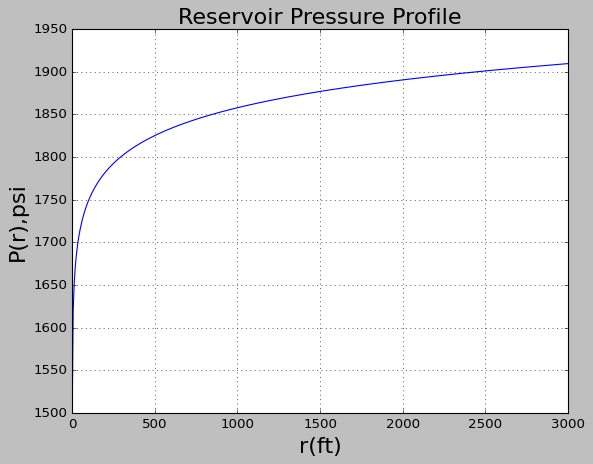

In [26]:
plt.figure(figsize=[8,6])
plt.plot(r,pressure)
plt.xlabel('r(ft)',size =20)
plt.ylabel('P(r),psi',size=20)
plt.title('Reservoir Pressure Profile',size = 20)
plt.grid(True)

In [27]:
def flowprofile(k,mu,q):
    re = 3000
    rw = 0.5
    pe = 4000
    B = 1
    h = 30
    r = np.linspace(rw,re,500)
    P = pe - (141.2*q*mu*B*(np.log(re/r))/k/h)
    y_min =P[np.where(r==rw)]
    plt.plot(r,P,linewidth =4)
    plt.axhline(y_min,linewidth = 3,color = 'red')
    plt.ylim(0,5000)
    plt.xlabel('r(ft)')
    plt.ylabel('P(r),psi')
    plt.title('Dynamic Pressure Profile')
    plt.grid(True)
    return r,P

In [28]:
w = interactive(flowprofile,k=(200,1000),mu = (10,220),q = (100,200))

interactive(children=(IntSlider(value=597, description='k', max=1000, min=200), IntSlider(value=115, descripti…

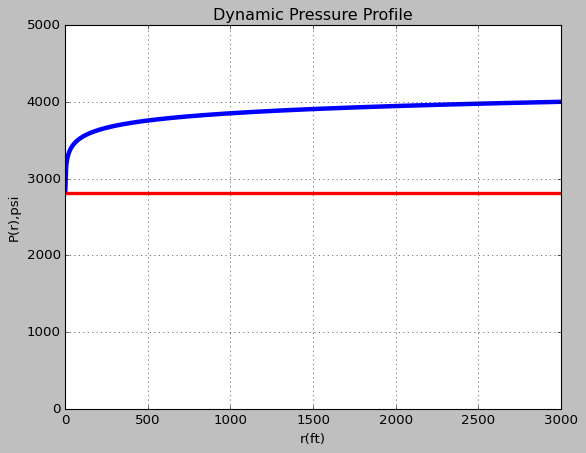

In [30]:
display(w)

If we increase permeability(k) , pwf will increase. Inshort pressure drop will be less.
Vice Versa.

If our oil is thicker, pressure drop would be larger.
Vice Versa.

If our flow rate is larger,pressure drop would be larger.Vice Versa

If oil reaches bottom hole pressure,higher energy,higher pressure, there would be no need of using Artificial Lift. Our aim is this only, that our oil reaches to surface at high pressure.